# Flight Price Prediction Project:

**STATEMENT: Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on**
- **1. Time of purchase patterns (making sure last-minute purchases are expensive)**
- **2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)**

**So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.**

# Importing datasets:

In [115]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [116]:
#To print all rows
pd.set_option('display.max_rows',None)

In [117]:
#importing dataset
df = pd.read_csv("Flight.csv") #Reading csv file
df.head()

,Unnamed: 0,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Spicejet,25/01/2022,Goa,Ahmedabad,06:20,08:20,Non stop,"₹ 5,315"
2,1,Go First,25/01/2022,Goa,Ahmedabad,13:15,20:25,1 stop via Mumbai,"₹ 5,315"
3,2,Go First,25/01/2022,Goa,Ahmedabad,14:00,20:55,1 stop via Bengaluru,"₹ 5,315"
4,3,Go First,25/01/2022,Goa,Ahmedabad,23:55,06:40,1 stop via Mumbai,"₹ 5,315"


Since Price is my target and it seems to be continuous feature so this particular problem is **Regression Problem**.

# Features Information:

- Airline: The name of the airline.
- Journey_date: The date of the journey
- From: The source from which the service begins.
- To: The destination where the service ends.
- Route: The route taken by the flight to reach the destination.
- D_Time: The time when the journey starts from the source.
- A_Time: Time of arrival at the destination.
- Stops: Total stops between the source and destination.
- Price: The price of the ticket

# Preprocessing and EDA:

In [118]:
#Checking shape of my dataset
df.shape

(1534, 9)

In my dataset i have 1534 rows and 9 columns.

In [119]:
#Removing Column "Unnamed:0 as it will not affect our core dataset
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Spicejet,25/01/2022,Goa,Ahmedabad,06:20,08:20,Non stop,"₹ 5,315"
2,Go First,25/01/2022,Goa,Ahmedabad,13:15,20:25,1 stop via Mumbai,"₹ 5,315"
3,Go First,25/01/2022,Goa,Ahmedabad,14:00,20:55,1 stop via Bengaluru,"₹ 5,315"
4,Go First,25/01/2022,Goa,Ahmedabad,23:55,06:40,1 stop via Mumbai,"₹ 5,315"


Removing Unnamed: 0 column as it is the index column of csv file.

In [120]:
#Removing First row as it have only NaN values
df=df.drop([df.index[0]])

Since i am having all the entries in first row as nan so i have dropped this row.

In [121]:
#Equalizing Price column
df.Price = df.Price.str.replace('[^0-9.]','').astype('float64')
df.head()

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
1,Spicejet,25/01/2022,Goa,Ahmedabad,06:20,08:20,Non stop,5315.0
2,Go First,25/01/2022,Goa,Ahmedabad,13:15,20:25,1 stop via Mumbai,5315.0
3,Go First,25/01/2022,Goa,Ahmedabad,14:00,20:55,1 stop via Bengaluru,5315.0
4,Go First,25/01/2022,Goa,Ahmedabad,23:55,06:40,1 stop via Mumbai,5315.0
5,Go First,25/01/2022,Goa,Ahmedabad,18:15,06:40,1 stop via Mumbai,5315.0


I have changed the price column datatype to float.

In [122]:
#Checking all column names
df.columns

Index(['Airline', 'Journey_date', 'From', 'To', 'Dtime', 'Atime', 'Stops',
       'Price'],
      dtype='object')

Above are the column names of the dataset.

In [123]:
#Checking the data types of all columns
df.dtypes

Airline          object
Journey_date     object
From             object
To               object
Dtime            object
Atime            object
Stops            object
Price           float64
dtype: object

Except Price all other columns are object type datas.But i have to convert journey_date, d_time and a_time columns from object to datetime type data.

In [124]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1533 entries, 1 to 1533
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       1533 non-null   object 
 1   Journey_date  1533 non-null   object 
 2   From          1533 non-null   object 
 3   To            1533 non-null   object 
 4   Dtime         1533 non-null   object 
 5   Atime         1533 non-null   object 
 6   Stops         1533 non-null   object 
 7   Price         1533 non-null   float64
dtypes: float64(1), object(7)
memory usage: 107.8+ KB


- There is no nan values in the dataset.But i have to convert journey_date, d_time and a_time columns from object to datetime type data.

In [125]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Go First               426
IndiGo                 425
Air India              381
Spicejet                95
Vistara                 76
AirAsia                 19
IndiGo, Spicejet        18
Spicejet, IndiGo        16
IndiGo, Air India       15
Spicejet, Air India      7
Go First, IndiGo         7
Air India, IndiGo        6
TruJet                   5
IndiGo, Vistara          4
AirAsia, IndiGo          4
Star Air                 3
Go First, Air India      3
IndiGo, AirAsia          3
IndiGo, Go First         3
Vistara, IndiGo          3
IndiGo, Star Air         2
Vistara, Go First        2
Spicejet, Vistara        2
Spicejet, Go First       2
Air India, Vistara       1
Go First, Vistara        1
Air India, Go First      1
Go First, Spicejet       1
Star Air, IndiGo         1
Vistara, Air India       1
Name: Airline, dtype: int64
****************************************
30/01/2022    246
25/01/2022    244
26/01/2022    240
27/01/2022    239
28/01/2022    197
31/01/2022    195
29/01/2022   

Above are the value counts of each column.In Airline and Stops column we have to use grouping to get better understanding on the feature.

In [126]:
#Grouping Airlines column for multiple airlines
df["Airline"].replace(("IndiGo, Spicejet","Spicejet, IndiGo","IndiGo, Air India","Spicejet, Air India","Go First, IndiGo","Air India, IndiGo","IndiGo, Vistara","AirAsia, IndiGo","Go First, Air India","IndiGo, Go First","Vistara, IndiGo","Spicejet, Go First","IndiGo, AirAsia","Spicejet, Vistara","IndiGo, Star Air","Vistara, Go First","Air India, Go First","Go First, Vistara","Vistara, Air India","Go First, Spicejet","Air India, Vistara","Star Air, IndiGo"),"Multiple Airlines",inplace=True)

In [127]:
#Checking the value counts of Airline column
df.Airline.value_counts()

Go First             426
IndiGo               425
Air India            381
Multiple Airlines    103
Spicejet              95
Vistara               76
AirAsia               19
TruJet                 5
Star Air               3
Name: Airline, dtype: int64

In [128]:
#Grouping Stops column 
df["Stops"].replace(("1 stop via Jalgaon","1 stop via Mumbai","1 stop via Hyderabad","1 stop via Bengaluru","1 stop via New Delhi","1 stop via Ahmedabad","1 stop via Goa","1 stop via Pune","1 stop via Lucknow","1 stop via Ranchi","1 stop via Kolkata","1 stop via Chennai","1 stop via Chandigarh","1 stop via Kochi","1 stop via Jaipur","2 stop via New Delhi,Chennai","1 stop via Nagpur","1 stop via Amritsar","1 stop via Patna","1 stop via Surat","1 stop via Guwahati","1 stop via Vadodara","1 stop via Udaipur","1 stop via Indore","1 stop via Bhavnagar","1 stop via Madurai","1 stop via Bagdogra","1 stop via Varanasi","1 stop via Srinagar","1 stop via Mangalore","1 stop via Jammu","1 stop via Vijayawada","1 stop via Jodhpur","1 stop via Kalaburagi","1 stop via Aurangabad","1 stop via Rajkot","1 stop via Mysore","1 stop via Bhopal","1 stop via Tirupati","1 stop via Dehradun","1 stop via Visakhapatnam"),"1 Stop",inplace=True)

In [129]:
#Grouping Stops column
df["Stops"].replace(("2 stop via Surat,New Delhi","2 stop via Hyderabad,Vijayawada","2 stop via New Delhi,Hyderabad","2 stop via Hyderabad,New Delhi","2 stop via Mumbai,Hyderabad","2 stop via Mumbai,New Delhi","2 stop via Hyderabad,Mumbai","2 stop via Bengaluru,Hyderabad","2 stop via Hyderabad,Bengaluru","2 stop via New Delhi,Mumbai","2 stop via Varanasi,Bengaluru","2 stop via New Delhi,Chandigarh","2 stop via Chandigarh,New Delhi","2 stop via Chandigarh,Ahmedabad","2 stop via Ranchi,New Delhi","2 stop via Ranchi,Bengaluru","2 stop via Ahmedabad,Chandigarh","2 stop via Chandigarh,Srinagar","2 stop via Bengaluru,Ranchi","2 stop via Jammu,Srinagar","2 stop via Kochi,Mumbai","2 stop via New Delhi,Varanasi","2 stop via Hyderabad,Mysore","2 stop via Mumbai,Ranchi","2 stop via Chennai,Ranchi","2 stop via Hyderabad,Pune","2 stop via Nagpur,Pune","2 stop via Chennai,Hyderabad","2 stop via Pune,Hyderabad","2 stop via Hyderabad,Nanded","2 stop via Vijayawada,Hyderabad","2 stop via Hyderabad,Goa","2 stop via Nanded,Hyderabad","2 stop via Mumbai,Chandigarh","2 stop via Belgaum,Hyderabad","2 stop via Chennai,Jaipur","2 stop via Hyderabad,Chennai","2 stop via Hyderabad,Tirupati","2 stop via Srinagar,Chandigarh","2 stop via Mangalore,Mumbai","2 stop via Amritsar,Srinagar","2 stop via Goa,Hyderabad","2 stop via Mysore,Hyderabad","2 stop via New Delhi,Bhopal","2 stop via New Delhi,Bhopal","2 stop via Surat,Hyderabad","2 stop via Surat,Hyderabad","2 stop via Surat,Hyderabad","2 stop via New Delhi,Chennai"),"2 Stops",inplace=True)

In [130]:
#Grouping Stops column
df["Stops"].replace(("3 stop via Hyderabad,New Delhi,Amritsar","3 stop via Hyderabad,New Delhi,Bengaluru","3 stop via Hyderabad,New Delhi,Bengaluru","3 stop via Bengaluru,New Delhi,Indore","3 stop via Hyderabad,New Delhi,Chennai","3 stop via New Delhi,Indore,Mumbai","3 stop via New Delhi,Indore,Mumbai","3 stop via Goa,New Delhi,Hyderabad","3 stop via Mumbai,Aurangabad,New Delhi","3 stop via Chandigarh,New Delhi,Ranchi","3 stop via New Delhi,Aurangabad,Mumbai","3 stop via Leh,Jammu,Srinagar","3 stop via Bhubaneswar,New Delhi,Hyderabad","3 stop via Hyderabad,New Delhi,Mumbai","3 stop via Indore,Hyderabad,Mumbai","3 stop via Hyderabad,New Delhi,Jaipur","3 stop via Hyderabad,New Delhi,Goa","3 stop via Ahmedabad,New Delhi,Hyderabad","3 stop via Belgaum,Hyderabad,Mumbai","3 stop via Hyderabad,New Delhi,Bhopal","3 stop via Mumbai,New Delhi,Hyderabad"),"3 Stops",inplace=True)

In [131]:
#Grouping Stops column
df["Stops"].replace(("4 stop via Patna,Kolkata,New Delhi,Hyderabad","4 stop via Hyderabad,New Delhi,Surat,Bhubaneswar","4 stop via Mysore,Kochi,New Delhi,Hyderabad","4 stop via Hyderabad,New Delhi,Raipur,Visakhapatnam","4 stop via Nasik,Pune,Bhopal,New Delhi","4 stop via Bhubaneswar,Surat,New Delhi,Hyderabad","4 stop via Nasik,Pune,New Delhi,Hyderabad"),"4 Stops",inplace=True)

In [132]:
#Grouping Stops column
df["Stops"].replace(("5 stop via Hyderabad,New Delhi,Nagpur,Raipur,Visakhapatnam"),"5 Stops",inplace=True)

In [133]:
#Checking the value counts of Stops column
df.Stops.value_counts()

1 Stop      938
Non stop    381
2 Stops     159
3 Stops      41
4 Stops      12
5 Stops       2
Name: Stops, dtype: int64

In [134]:
#Let me assign values for Stops column
df.replace({"Non stop": 0,"1 Stop": 1,"2 Stops": 2,"3 Stops": 3,"4 Stops": 4,"5 Stops": 5 },inplace = True)

In [135]:
#Checking the value counts of Stops column again
df.Stops.value_counts()

1    938
0    381
2    159
3     41
4     12
5      2
Name: Stops, dtype: int64

Now Stops column is set for our analysis.

In [136]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Airline         0
Journey_date    0
From            0
To              0
Dtime           0
Atime           0
Stops           0
Price           0
dtype: int64


I don't find any nan values in the dataset.

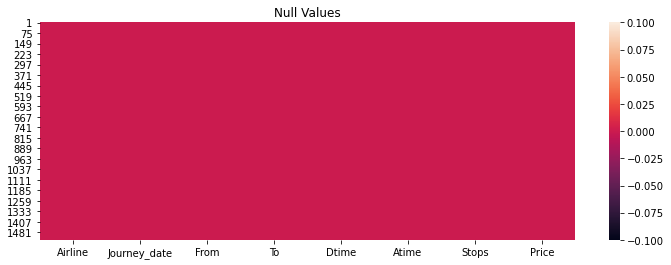

In [137]:
#Visualizeing null values
plt.figure(figsize=[12,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization we can clearly say that there is no null values in the dataset.

In [138]:
#Checking for empty observations
df.loc[df['Price'] == " "]

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price


There is no empty observations in my target column.

# Feature Extraction:

In [139]:
#Converting object data type to datetime in Journey_date column 
df['Journey_date'] =  pd.to_datetime(df['Journey_date'])

In [140]:
#Extracting Journey year,month and day from Journey_date

#Extracting year
df["Journey_year"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.year

#Extracting month
df["Journey_mon"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.month

#Extracting day
df["Journey_day"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.day

In [141]:
#Checking valuecount of Journey_year column
df.Journey_year.value_counts()

2022    1533
Name: Journey_year, dtype: int64

Since all the entries in Journey_year column are same let's drop as it will not help in our core analysis.

In [142]:
#Droping Journey_year column
df = df.drop(["Journey_year"],axis=1)

In [143]:
#Checking valuecount of Journey_mon column
df.Journey_mon.value_counts()

1    1533
Name: Journey_mon, dtype: int64

Since all the entries in Journey_mon column are same let's drop as it will not help in our core analysis.

In [144]:
#Droping Journey_mon column
df = df.drop(["Journey_mon"],axis=1)

In [145]:
#Checking valuecount of Journey_year column
df.Journey_day.value_counts()

30    246
25    244
26    240
27    239
28    197
31    195
29    172
Name: Journey_day, dtype: int64

Now Journey_day is ready for our analysis.

In [146]:
#Droping Journey_date column
df = df.drop(["Journey_date"],axis=1)

Dropping Journey_date column after extracting requered information.

In [147]:
#Converting object data type to datetime 
df['Dtime'] =  pd.to_datetime(df['Dtime'])
df['Atime'] =  pd.to_datetime(df['Atime'])

In [148]:
#Checking the data types of all columns again
df.dtypes

Airline                object
From                   object
To                     object
Dtime          datetime64[ns]
Atime          datetime64[ns]
Stops                   int64
Price                 float64
Journey_day             int64
dtype: object

The data type has changed now.

In [149]:
#Extracting hours and minutes from Dtime

#Extracting Hours
df["Dhour"]=pd.to_datetime(df["Dtime"]).dt.hour

#Extracting Hours
df["DMin"]=pd.to_datetime(df["Dtime"]).dt.minute

In [150]:
#Droping Dep_Time column after extraction
df = df.drop(["Dtime"],axis=1)

In [151]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df["AHour"]=pd.to_datetime(df["Atime"]).dt.hour

#Extracting Hours
df["AMin"]=pd.to_datetime(df["Atime"]).dt.minute

In [152]:
#Droping Arrival_Time column after extraction
df = df.drop(["Atime"],axis=1)

In [153]:
#Checking the data types of all columns again
df.dtypes

Airline         object
From            object
To              object
Stops            int64
Price          float64
Journey_day      int64
Dhour            int64
DMin             int64
AHour            int64
AMin             int64
dtype: object

This is the datatypes after extraction and preprocessing.

In [154]:
#Checking description of data set
df.describe()

,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
count,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000
mean,0.937378,7479.955643,27.868232,13.296804,24.605349,14.009132,27.977821
std,0.739588,3429.789317,2.024553,5.952486,17.313652,6.384435,16.315894
min,0.000000,2999.000000,25.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4476.000000,26.000000,8.000000,10.000000,9.000000,15.000000
50%,1.000000,6018.000000,28.000000,14.000000,20.000000,14.000000,30.000000
75%,1.000000,9160.000000,30.000000,18.000000,40.000000,19.000000,40.000000
max,5.000000,22957.000000,31.000000,23.000000,55.000000,23.000000,55.000000


Above is the statistics about the dataset.The mean and the 2nd quantile values are almost same so there is no extreme outliers in the dataset.

# Visualization:

# Univariate Analysis:

In [155]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'From', 'To']


Above are the categorical columns in the data set.

In [156]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Stops', 'Price', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']


Above are the numerical columns in the data set.

# Univariate analysis for numerical columns:

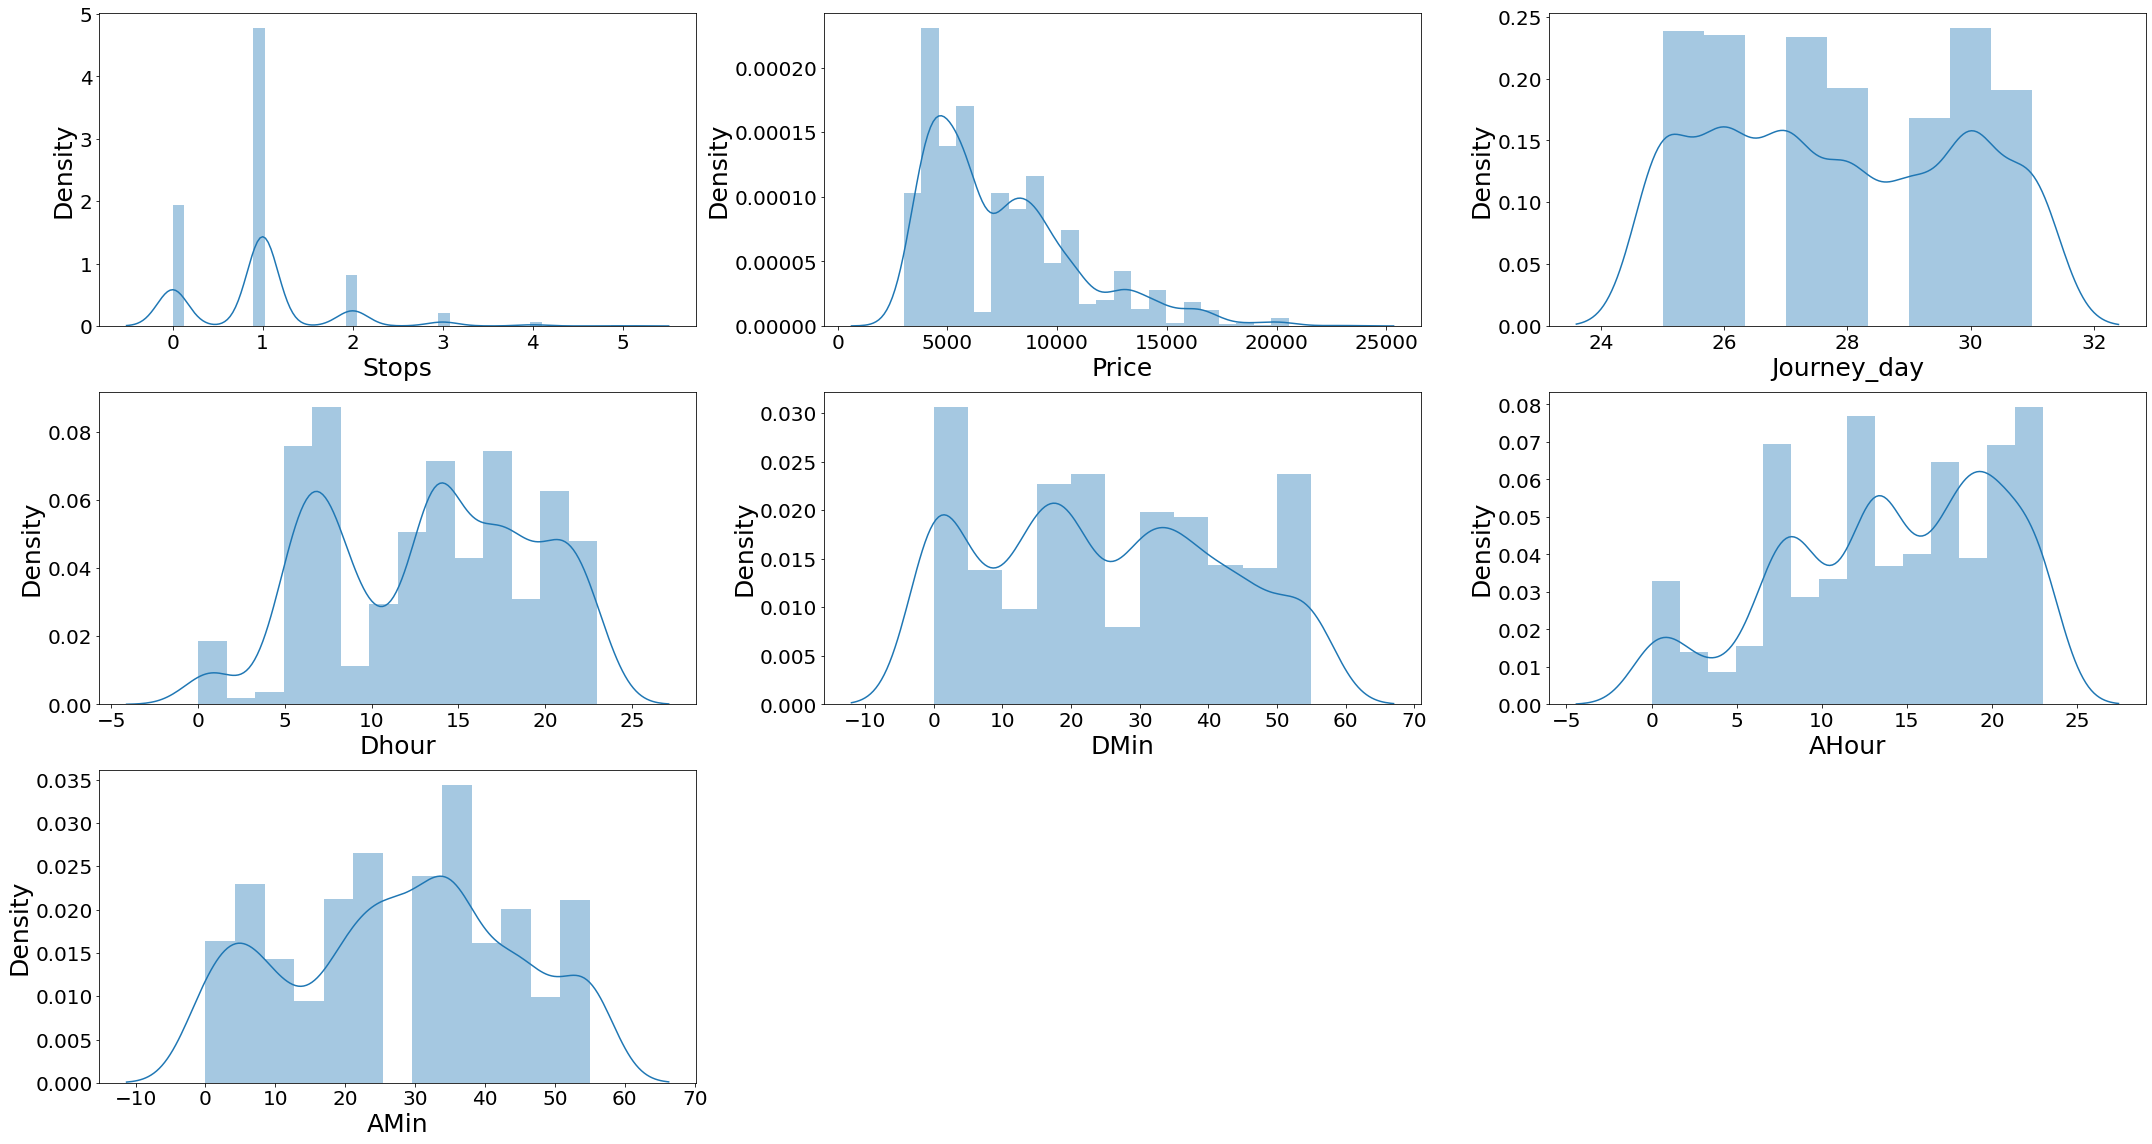

In [157]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,16))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
        plt.xticks(fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

There is no skewness in any of the numerical columns.

# Univariate Analysis for categorical columns:

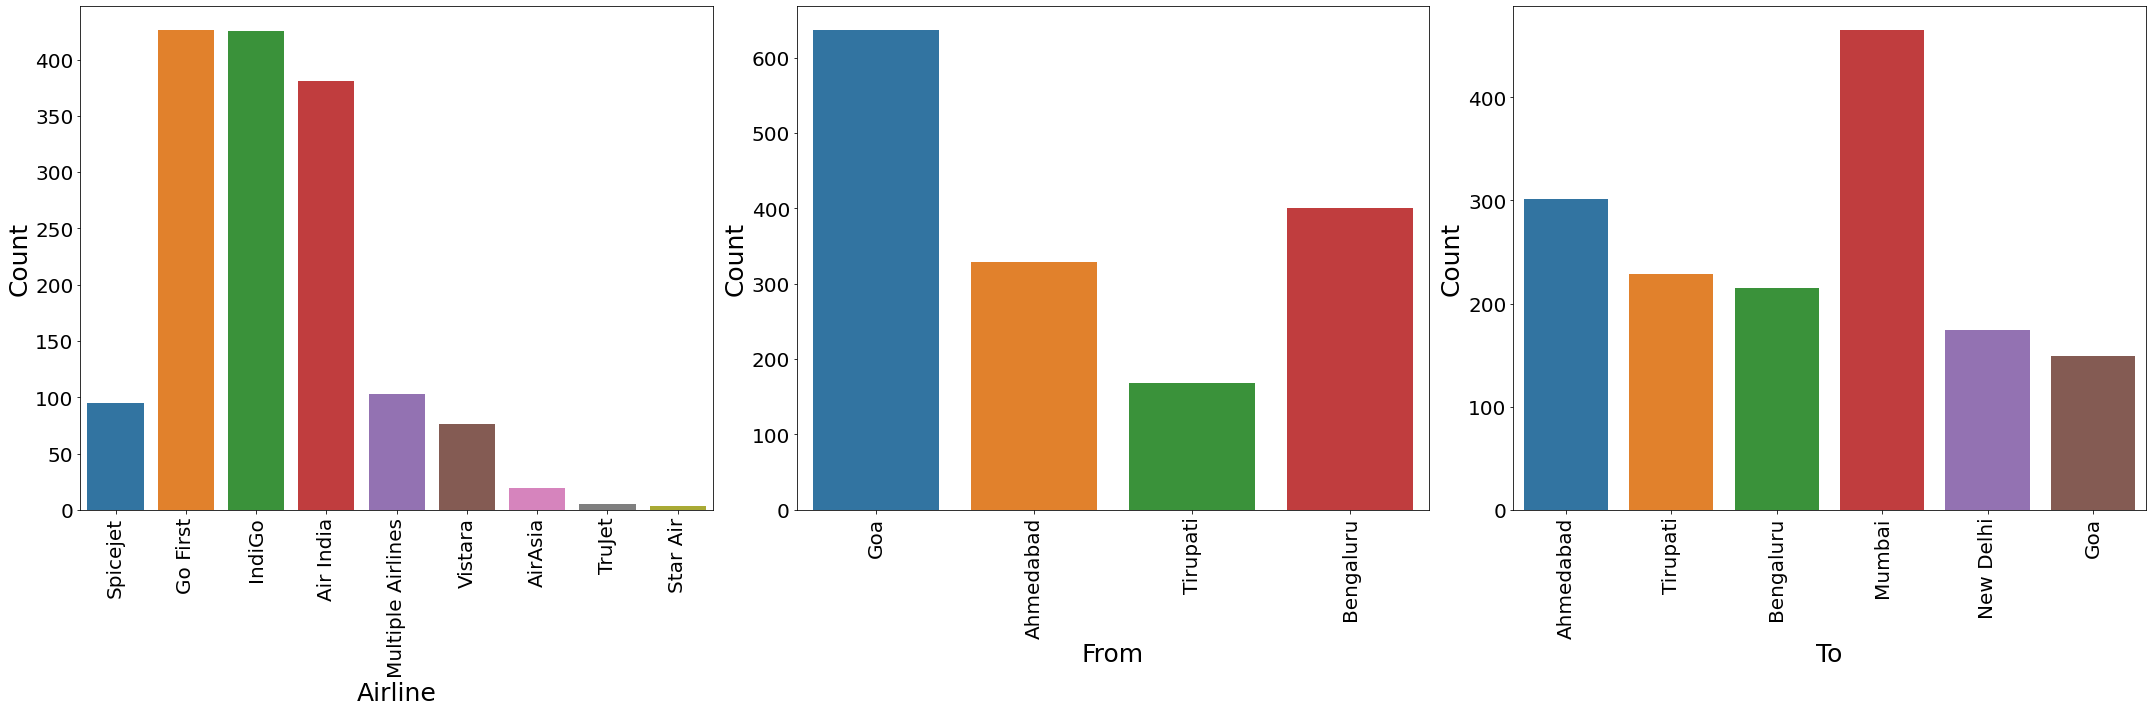

In [158]:
#Bar plot for all Categorical columns
plt.figure(figsize = (30,10))
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Count',fontsize = 25)
        plt.xticks(rotation=90,fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Indigo has maximum count which means most of the passengers preferred Indigo for there travelling.
- New Delhi has maximum count for source which means maximum passengers are choosing New Delhi as there source.
- New Delhi has maximum count for Destination which means maximum passengers are choosing New Delhi as there Destination.

# Bivariate Analysis:

In [159]:
col=['Stops', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']

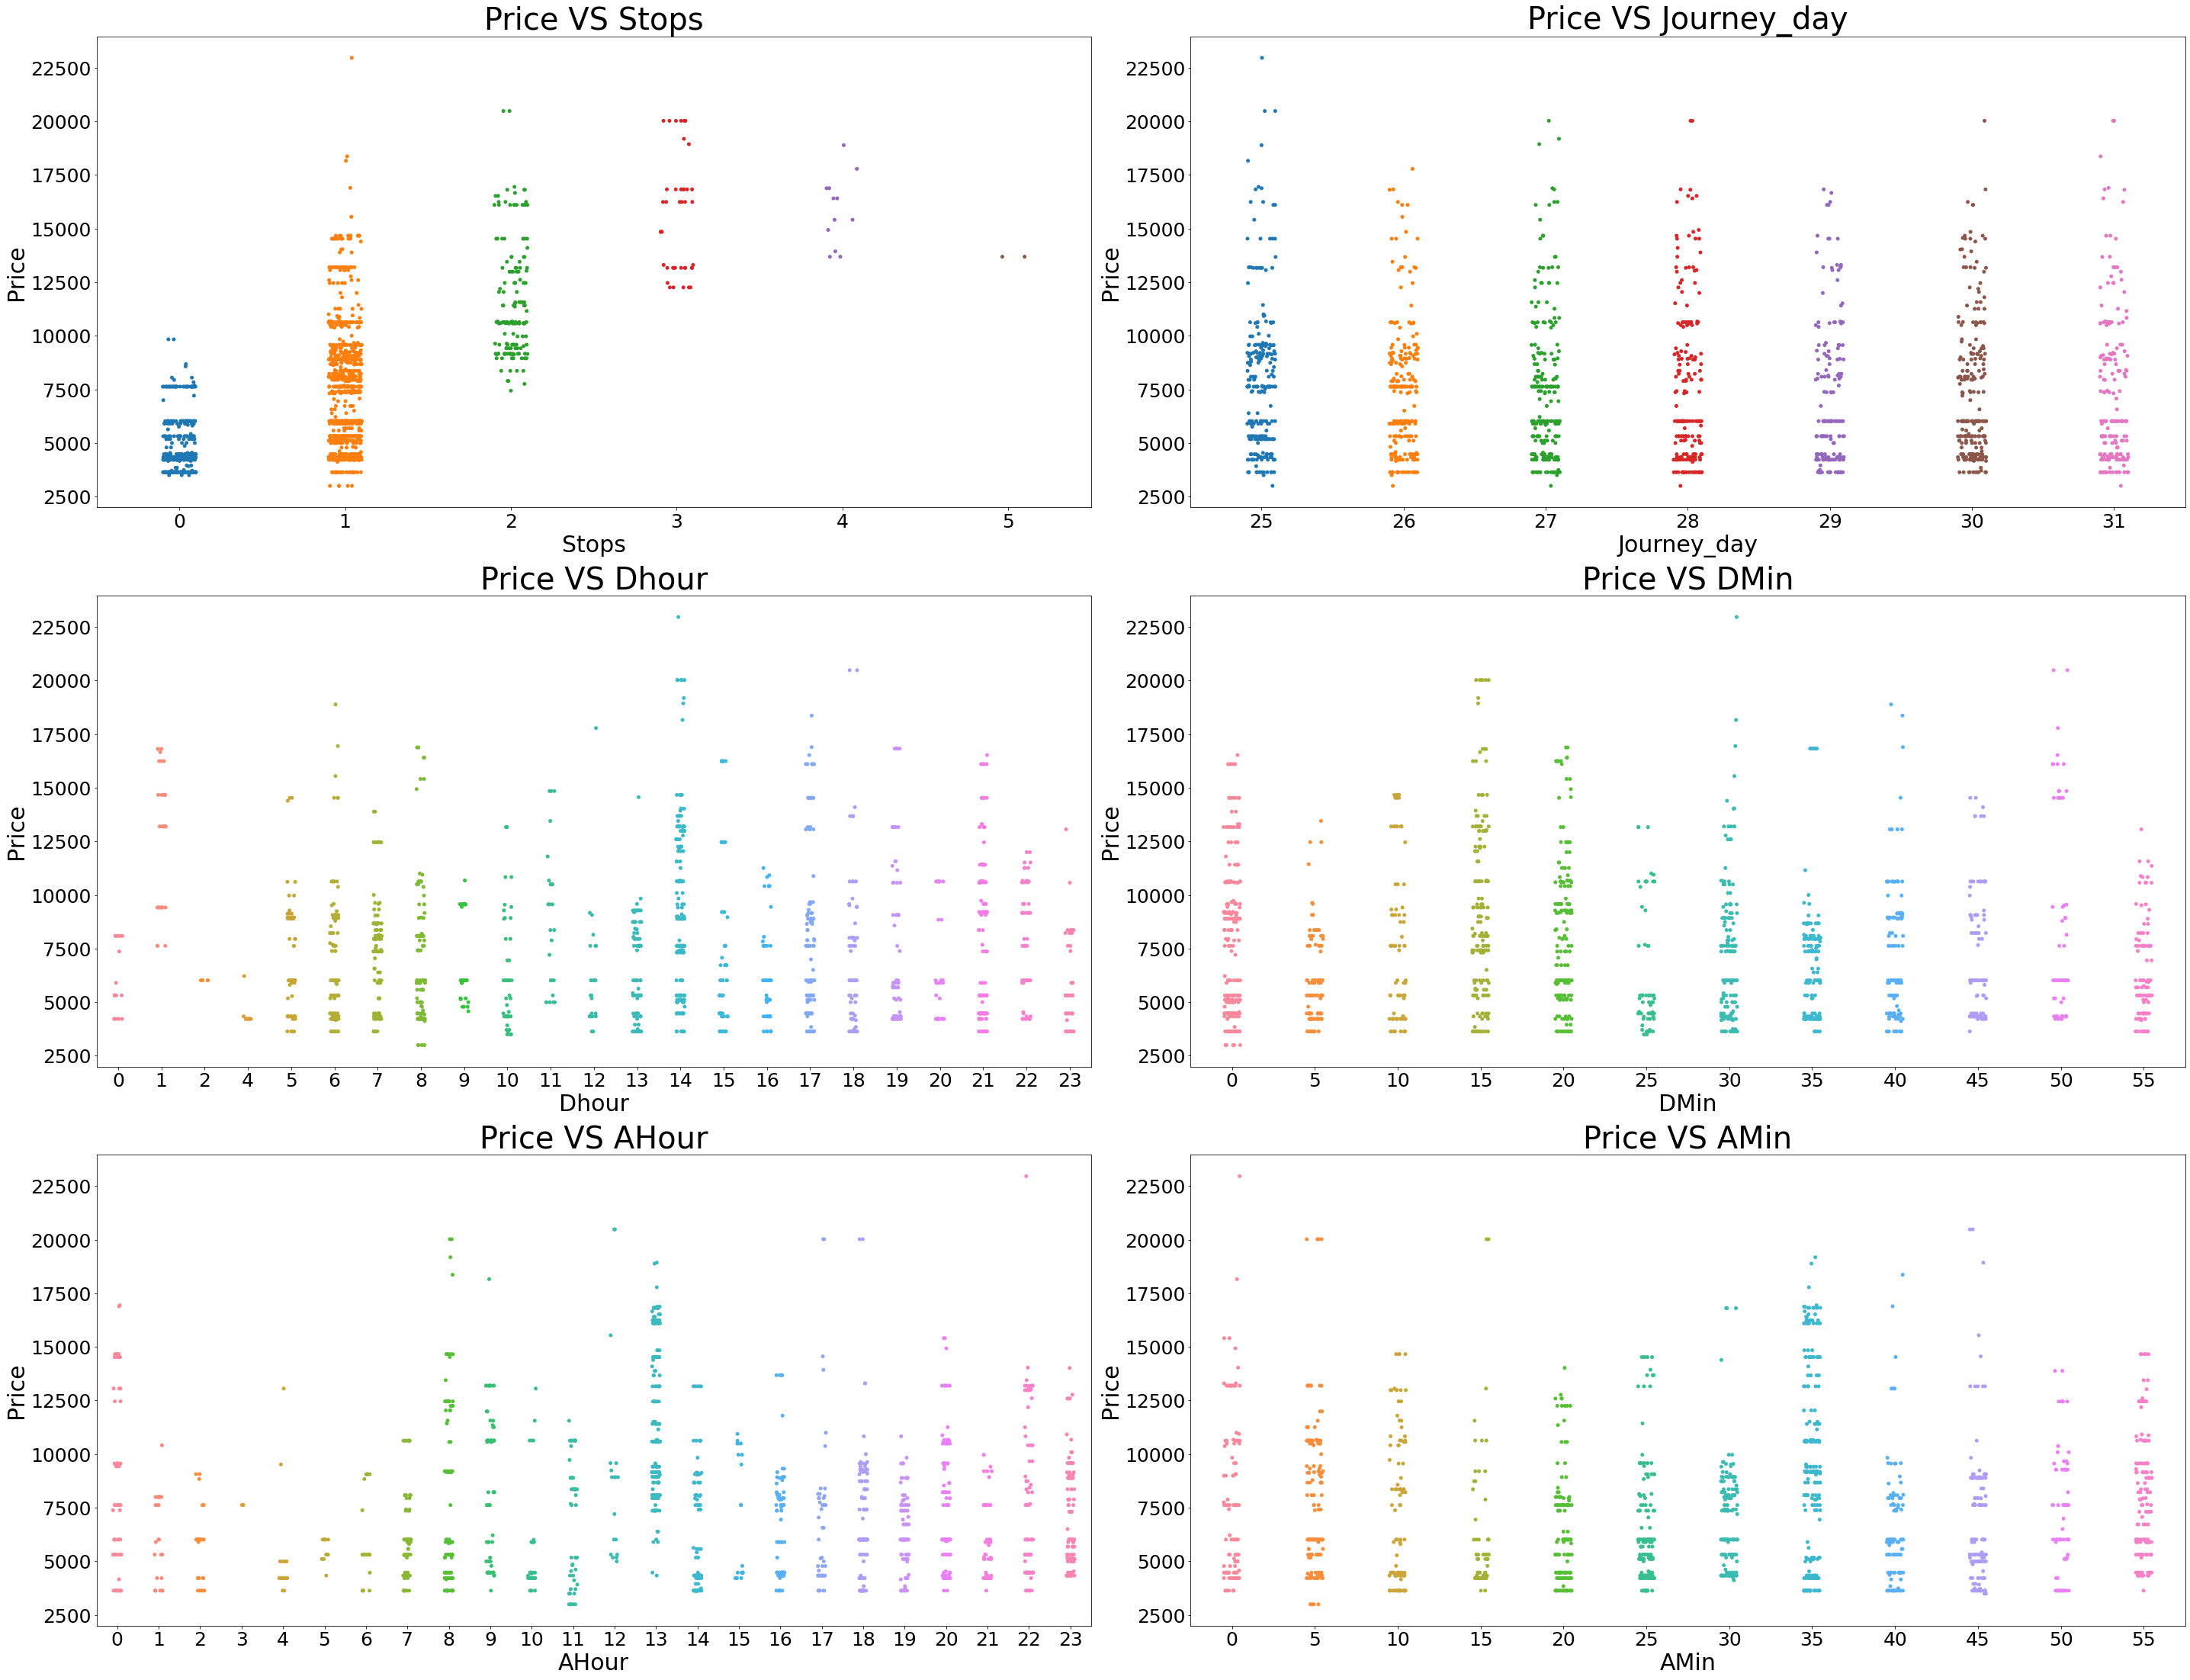

In [160]:
#stripplot for numerical columns
plt.figure(figsize=(40,40))
for i in range(len(col)):
    plt.subplot(4,2,i+1)
    sns.stripplot(x=df[col[i]] , y=df['Price'])
    plt.title(f"Price VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=25)  
    plt.yticks(fontsize=25)
    plt.xlabel(col[i],fontsize = 30)
    plt.ylabel('Price',fontsize = 30)
    plt.tight_layout()

**Observations:**
- Flights with 2 stops costs more price compared to other flights.
- In all the dates the price is almost same.
- At 2PM departure time of every day the flight Prices are high so it looks good to book flights rather than this departure time.
- And Departure minute has less relation with target Price.
- At 7AM to 1PM Arrival time of every day the flight Prices are high so it looks good to book flights rather than this arrival time.
- And Arrival minute has less relation with target Price.

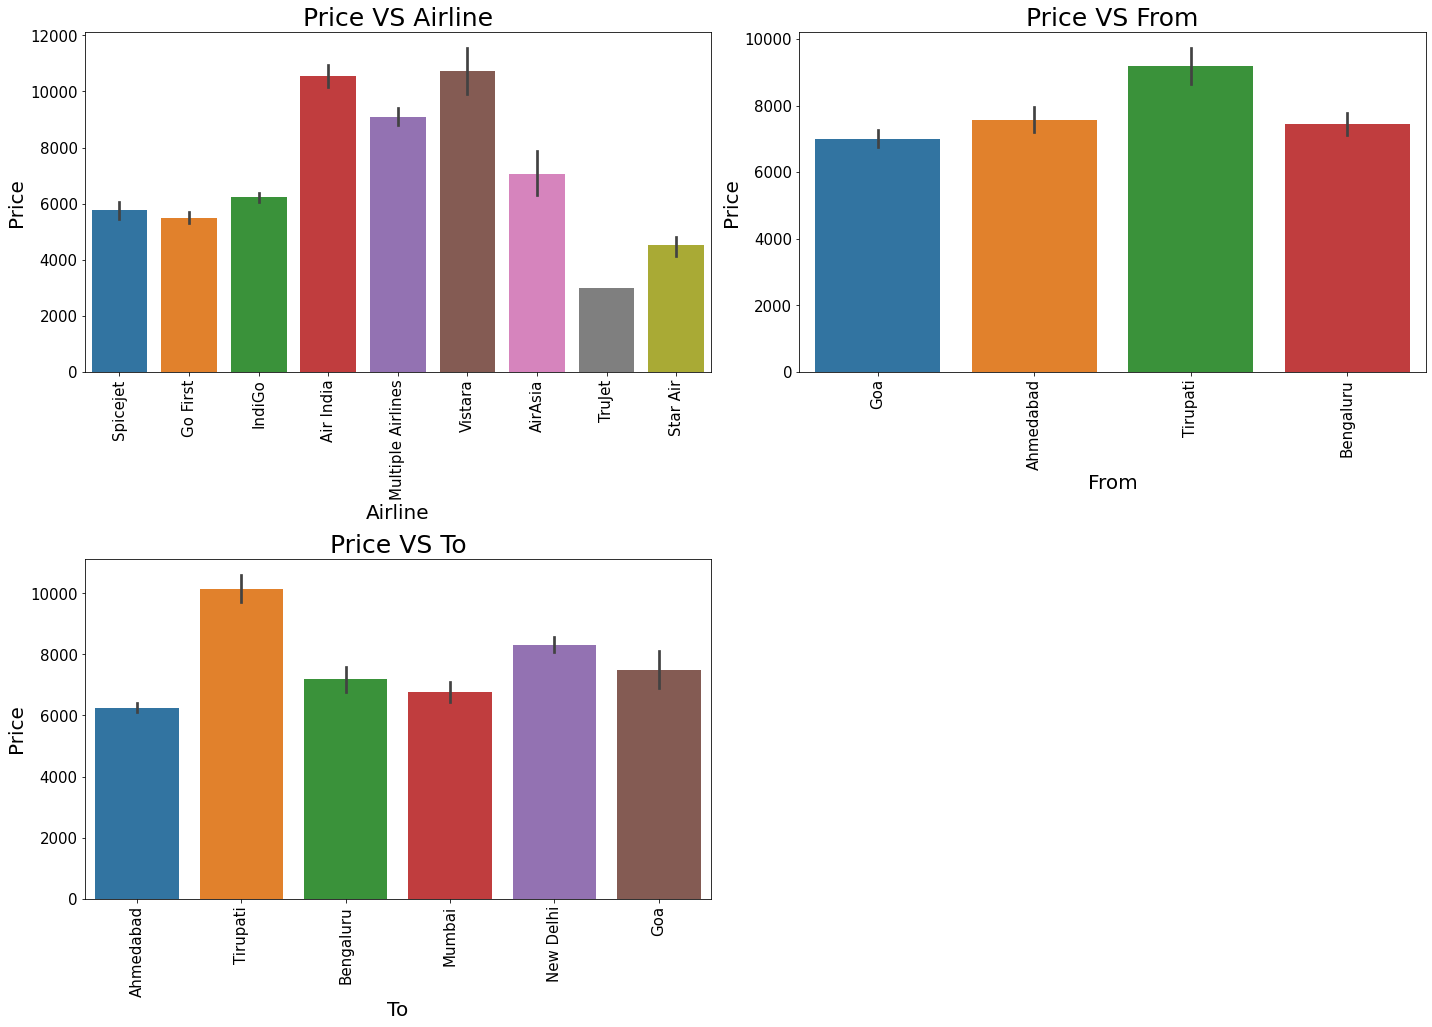

In [161]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,20))
for i in range(len(categorical_columns)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['Price'],x=df[categorical_columns[i]])
    plt.title(f"Price VS {categorical_columns[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(categorical_columns[i],fontsize = 20)
    plt.ylabel('Price',fontsize = 20)
    plt.tight_layout()

**Observations:**
- For Multiple Airlines the Price is high compared to other Airlines.
- Taking Tirupati as Source costs highest Price Compared to other Source points.
- Taking Tirupati as Destination costs highest Price Compared to other Destination points.

# Multivariate Analysis:

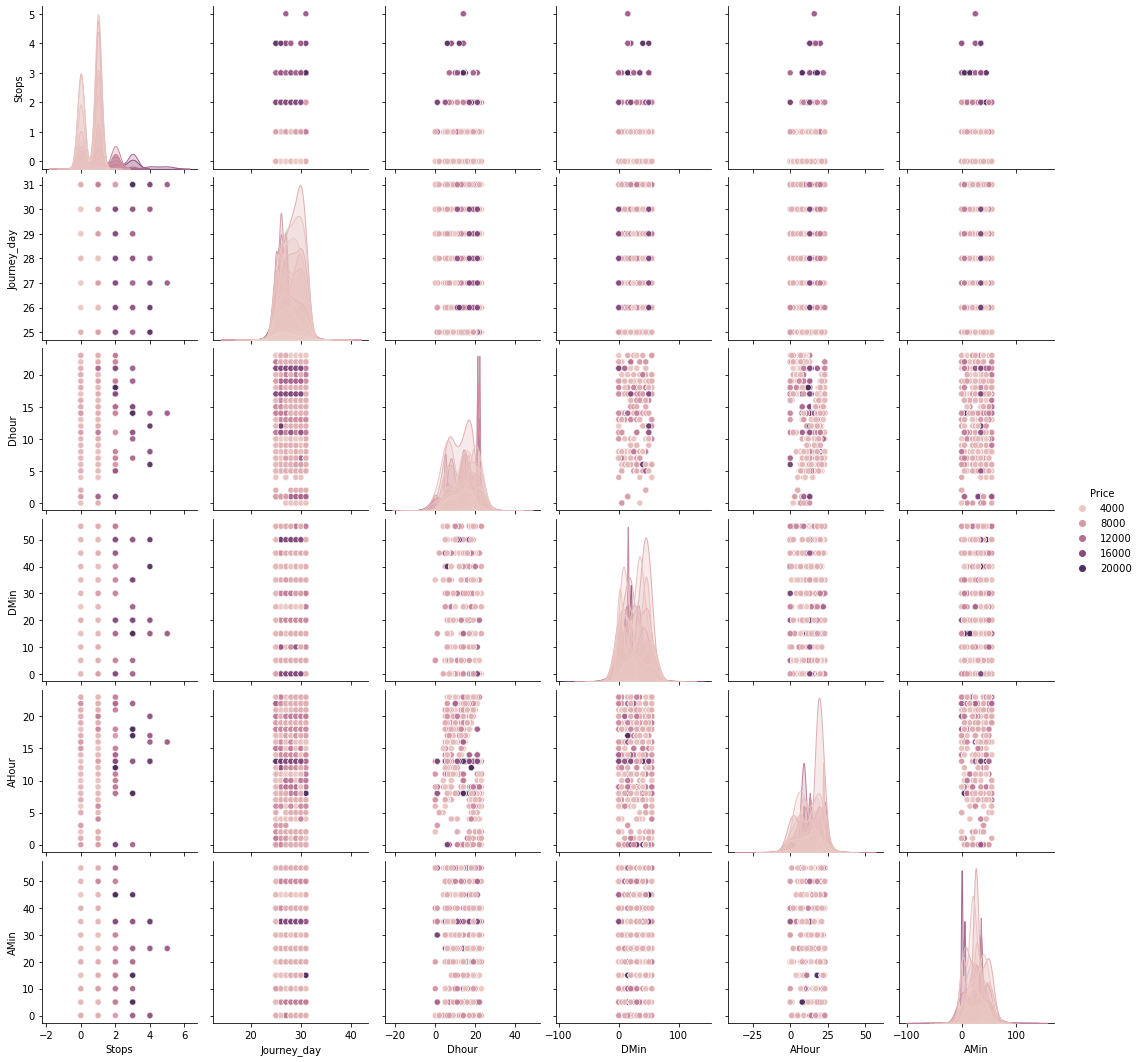

In [162]:
#pair ploting for df
sns.pairplot(df,hue="Price")

Above are the pair plots of each pair of features.

# Checking for outliers:

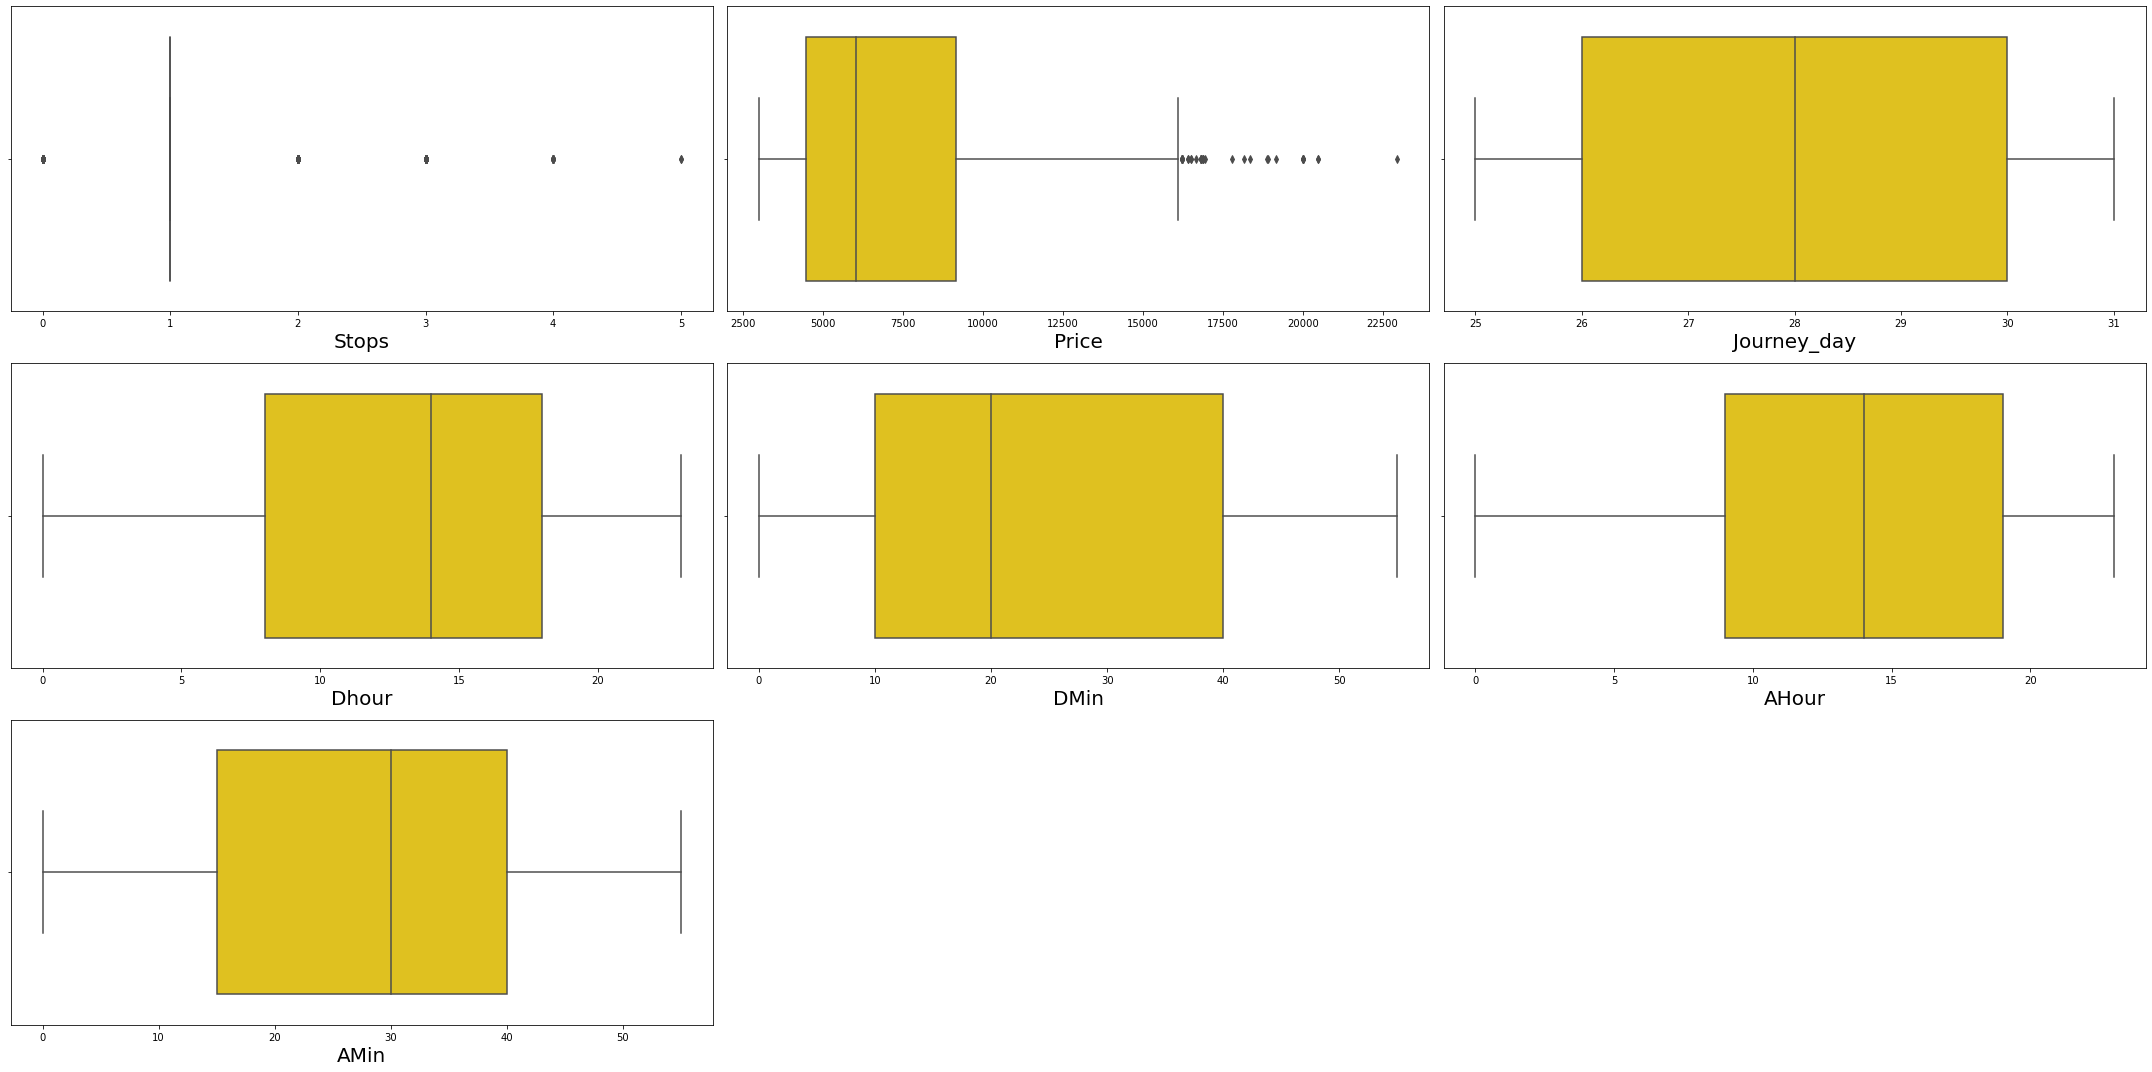

In [163]:
# Identifying the outliers using boxplot

plt.figure(figsize=(30,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in 
- Stops
- Price

Since Price is my target i should not remove outliers from this column.And Stops is a categorical column So i should not remove outliers here also.

# Checking for skewness:

In [164]:
#Checking for skewness
df.skew()

Stops          1.156472
Price          1.162116
Journey_day    0.090086
Dhour         -0.165137
DMin           0.139211
AHour         -0.466963
AMin          -0.088549
dtype: float64

There is skewness in Stops and Price.Since Price is my target i should not remove skewness in that column since i don't want my target to get manupulated. And Stops is categorical column so i should not remove skewness here also.

# Label Encoding:

In [165]:
# Separating categorical columns in df_1
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'From', 'To']


Above are the list of categorical columns in df.

In [166]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)

In [167]:
df.head()

,Airline,From,To,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
1,5,2,0,0,5315.0,25,6,20,8,20
2,2,2,0,1,5315.0,25,13,15,20,25
3,2,2,0,1,5315.0,25,14,0,20,55
4,2,2,0,1,5315.0,25,23,55,6,40
5,2,2,0,1,5315.0,25,18,15,6,40


Using label encoder i have encoded the categorical columns.

# Checking correlation using heat map:

In [168]:
cor=df.corr()

Checking correlation.

In [169]:
cor

,Airline,From,To,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
Airline,1.000000,0.026645,-0.061313,-0.294310,-0.165513,-0.053989,-0.207509,0.173343,0.059160,-0.039187
From,0.026645,1.000000,0.022801,0.006788,0.049177,0.068163,0.077092,-0.161274,0.127500,0.069884
To,-0.061313,0.022801,1.000000,0.254295,0.293615,-0.049249,-0.056359,-0.082359,-0.039635,0.036765
Stops,-0.294310,0.006788,0.254295,1.000000,0.686135,0.023257,0.014900,-0.092158,0.008139,0.018168
Price,-0.165513,0.049177,0.293615,0.686135,1.000000,-0.046949,0.001756,-0.077275,-0.033466,0.020505
Journey_day,-0.053989,0.068163,-0.049249,0.023257,-0.046949,1.000000,-0.008235,-0.009213,-0.020763,-0.036527
Dhour,-0.207509,0.077092,-0.056359,0.014900,0.001756,-0.008235,1.000000,-0.115212,-0.046395,0.017475
DMin,0.173343,-0.161274,-0.082359,-0.092158,-0.077275,-0.009213,-0.115212,1.000000,-0.048567,0.000292
AHour,0.059160,0.127500,-0.039635,0.008139,-0.033466,-0.020763,-0.046395,-0.048567,1.000000,0.109617
AMin,-0.039187,0.069884,0.036765,0.018168,0.020505,-0.036527,0.017475,0.000292,0.109617,1.000000


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

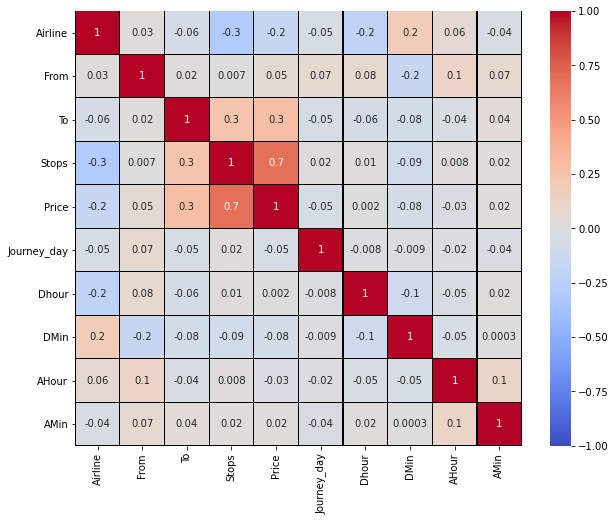

In [170]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

- There is no multicolinearity issue in any features.
- AMin is very less correlated with target.

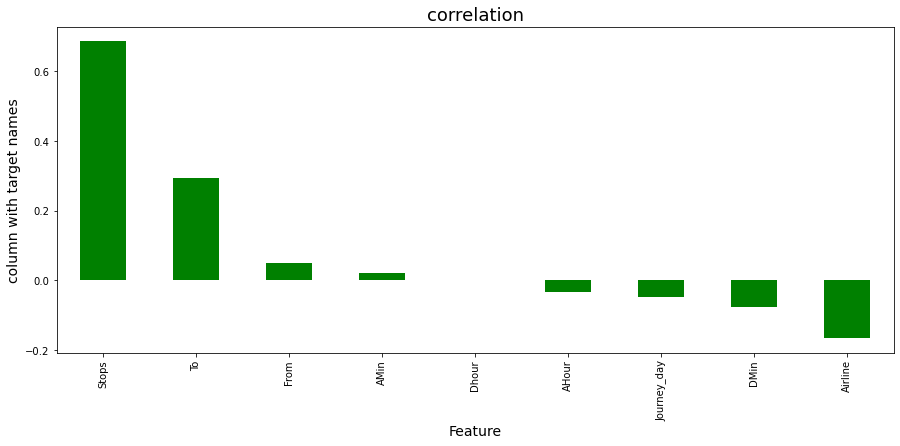

In [171]:
plt.figure(figsize=(15,6))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

AMin is very less correlated with target.

# Separating features and label in train dataset:

In [172]:
x = df.drop("Price",axis=1)
y = df["Price"]

I have separated my target and independent columns.

# Scaling the data using standard scaler:

In [173]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using standard scaler.

In [174]:
X.head()

,Airline,From,To,Stops,Journey_day,Dhour,DMin,AHour,AMin
0,1.321878,0.614734,-1.454001,-1.267847,-1.417186,-1.226241,-0.266082,-0.941523,-0.489120
1,-0.209051,0.614734,-1.454001,0.084700,-1.417186,-0.049878,-0.554966,0.938661,-0.182570
2,-0.209051,0.614734,-1.454001,0.084700,-1.417186,0.118173,-1.421617,0.938661,1.656728
3,-0.209051,0.614734,-1.454001,0.084700,-1.417186,1.630640,1.756104,-1.254887,0.737079
4,-0.209051,0.614734,-1.454001,0.084700,-1.417186,0.790381,-0.554966,-1.254887,0.737079


This is the data of independent variables after scaling.

# Checking for multicolinearity issue using VIF:

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.182981,Airline
1,1.061619,From
2,1.087395,To
3,1.170561,Stops
4,1.014711,Journey_day
5,1.069443,Dhour
6,1.076189,DMin
7,1.039885,AHour
8,1.021589,AMin


There is no multicolinearity issue in this dataset.

# Finding Best Random State and Accuracy:

In [176]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [177]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.900349628971563  on Random_state  99


I got the best accuracy and random state.

In [178]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms:

In [179]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:

In [180]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 90.46727238959726
mean_squared_error: 1085832.3282818352
mean_absolute_error: 518.4423976708074
root_mean_squared_error: 1042.032786567599


RFR is giving me 81.06% r2_score.

# ii) XGB Regressor:

In [181]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 87.20345350303383
mean_squared_error: 1457600.0117326842
mean_absolute_error: 684.3821363366169
root_mean_squared_error: 1207.3110666819402


XGB is giving me 79.57% r2_score.

# iii) ExtraTreeRegressor:

In [182]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8854975647800832
mean_squared_error: 1304248.3841991303
mean_absolute_error: 459.5374782608696
root_mean_squared_error: 1142.036945198854


ETR is giving me 81.18% r2_score.

# iv) Gradient Boosting Regressor:

In [183]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8342938992204724
mean_squared_error: 1887487.491235859
mean_absolute_error: 965.0324552858405
root_mean_squared_error: 1373.858613990486


GBR is giving me 65.69% r2_score.

# v) DecisionTreeRegressor:

In [184]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8161503722798092
mean_squared_error: 2094152.6652173912
mean_absolute_error: 512.5130434782609
root_mean_squared_error: 1447.1187460666079


DTR is giving me 64.60% r2_score.

# vi) KNN:

In [185]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7558967263219389
mean_squared_error: 2780476.2375652175
mean_absolute_error: 1038.7904347826086
root_mean_squared_error: 1667.4760080928354


KNN is giving me 53.26% r2_score.

# vii) Bagging Regressor:

In [186]:
BG=BaggingRegressor()
BG.fit(X_train,y_train)
pred=BG.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8890952273544006
mean_squared_error: 1263268.9448497826
mean_absolute_error: 541.0890652173913
root_mean_squared_error: 1123.9523765933245


Bagging Regressor is giving me 78.98% r2_score.

By looking into the model r2_score and error i found **ExtraTreesRegressor** as the best model with highest r2_score and least errors.

# Hyper Parameter Tuning:

In [187]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [188]:
parameter = {'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4],
             'n_estimators':[20,40,60,80,100],
             'min_samples_leaf':[1,2,3,4,5],
              'n_jobs':[-2,-1,1,2]}

Giving ETR parameters.

In [189]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

Running grid search CV for ETR.

In [190]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'n_jobs': [-2, -1, 1, 2]})

Tunning the model using GCV.

In [191]:
GCV.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100,
 'n_jobs': -1}

Got the best parameters for ETR.

In [192]:
Best_mod=ExtraTreesRegressor(max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=80,n_jobs=1)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 90.6715033015579
mean_squared_error: 1062569.2565037904
mean_absolute_error: 499.7434006312981
RMSE value: 1030.8100001958608


This is my model after tuning.I got 82.01% as r2_score before it was 81.18% which means accuracy has increased which is gooddd!!!.

# Saving the model:

In [193]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Flight_Price.pkl")

['Flight_Price.pkl']

I have saved my model as Flight_Price.Using .pkl

# Predicting Flight Price for test dataset using Saved model of trained dataset:

In [194]:
# Loading the saved model
model=joblib.load("Flight_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([ 3635.66541667,  4217.1875    , 13696.5625    ,  5519.19613095,
        5842.5       ,  4350.47083333,  9268.18875   ,  7459.88854167,
        5089.546875  ,  5020.24375   ,  5321.071875  ,  7375.64041667,
        5733.41458333,  7419.43333333,  8826.95981571,  4718.484375  ,
        4407.95875   ,  7608.525     ,  9064.12083333, 14689.6       ,
        6095.61104167,  3679.24666667,  6619.38998512,  8609.659375  ,
       12025.375     ,  5360.80625   , 15241.55606061,  6018.        ,
        6344.10325893,  7994.41814904,  9347.73541667,  4404.74208333,
        6058.83020833, 10739.09354167,  5097.84895833, 10973.98362013,
        4259.95104167,  7633.69895833,  7623.81875   ,  6013.60833333,
        4246.28333333,  5766.46458333,  5361.29479167,  6056.1125    ,
        6298.0125    ,  7964.59054487,  4262.009375  ,  6263.14375   ,
       10562.68541667, 11234.94791667,  7301.293125  , 11100.22395833,
        7931.77375   ,  4237.1375    ,  7490.55729167,  4609.48020833,
      

In [195]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,459
Predicted,3635.665417,4217.1875,13696.5625,5519.196131,5842.5,4350.470833,9268.18875,7459.888542,5089.546875,5020.24375,...,4478.647917,4371.1025,6359.395536,4555.067708,8917.004167,8132.726042,8065.431563,8836.803566,6028.6475,5108.321875
Actual,3635.000000,4221.0000,13672.0000,5315.000000,4337.0,4337.000000,9442.00000,7627.000000,3498.000000,5178.00000,...,4477.000000,4337.0000,5315.000000,3635.000000,8362.000000,8088.000000,8088.000000,8894.000000,6017.0000,5109.000000


Above are the predicted values and the actual values.They are almost similar.

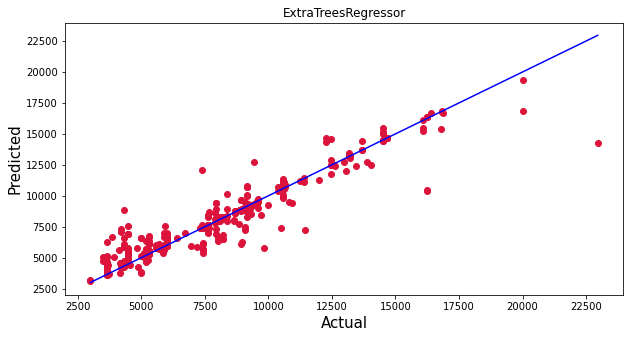

In [196]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.

# Done: Thank You:)

# Stay Safe:)